**It will tell you which part of the code took how long to run**

In [ ]:
import cProfile

Syntax: cProfile.run(statement, filename=none, sorts=1)

In [ ]:
cProfile.run("20+10")

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
import cProfile
import re
cProfile.run('re.compile("foo|bar")')

         6 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 re.py:234(compile)
        1    0.000    0.000    0.000    0.000 re.py:273(_compile)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




**Profiling a function that calls other functions**

In [ ]:
# Code contaiing multiple functions
def create_array():
  arr = []
  for i in range(0, 40000):
    arr.append(i)

def print_statement():
  print(" Array created sussessfully")

def main():
  create_array()


if __name__ == "__main__":
  cProfile.run("main()")

         40005 function calls in 0.010 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.010    0.010 <ipython-input-51-060f8711cef7>:10(main)
        1    0.006    0.006    0.010    0.010 <ipython-input-51-060f8711cef7>:2(create_array)
        1    0.000    0.000    0.010    0.010 <string>:1(<module>)
        1    0.000    0.000    0.010    0.010 {built-in method builtins.exec}
    40000    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




The pstats module can be used to manipulate the results collected by the profiler object.

**Sort the outputs by ncalls**

In [ ]:
if __name__ == "__main__":
  import cProfile, pstats
  profiler = cProfile.Profile()
  profiler.enable()
  main()
  profiler.disable()
  stats = pstats.Stats(profiler).sort_stats("ncalls")
  stats.print_stats()

         40003 function calls in 0.009 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    40000    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        1    0.006    0.006    0.009    0.009 <ipython-input-51-060f8711cef7>:2(create_array)
        1    0.000    0.000    0.009    0.009 <ipython-input-51-060f8711cef7>:10(main)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




**You can also sort it by the cumulative time**

In [ ]:
if __name__ == "__main__":
  import cProfile, pstats
  profiler = cProfile.Profile()
  profiler.enable()
  main()
  profiler.disable()
  stats = pstats.Stats(profiler).sort_stats("cumtime")
  stats.print_stats()

         40003 function calls in 0.010 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.010    0.010 <ipython-input-51-060f8711cef7>:10(main)
        1    0.007    0.007    0.010    0.010 <ipython-input-51-060f8711cef7>:2(create_array)
    40000    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




**Then, How can we store the data?** 

In [ ]:
# Export profiler output to file
stats = pstats.Stats(profiler)
stats.dump_stats("/content/export-data")

**Visualize profiling results via terminal**

1. Gprof2dot

In [2]:
!pip install gprof2dot

  Created wheel for gprof2dot: filename=gprof2dot-2021.2.21-py3-none-any.whl size=27762 sha256=5d8f2dd8fbf68d5a51dc515693542f748f1e9d5c76e13a941e861d1cea37ad54
  Stored in directory: /root/.cache/pip/wheels/70/ff/20/2eafd73841d3a2cb7a920cecd29cb5edbe460037ac17c1ae96
Successfully built gprof2dot


In [3]:
!python -m cProfile -o output.pstats addition.py

50.42928
50.53446
50.51801


In [4]:
!gprof2dot -f pstats output.pstats | dot -Tpng -o output.png

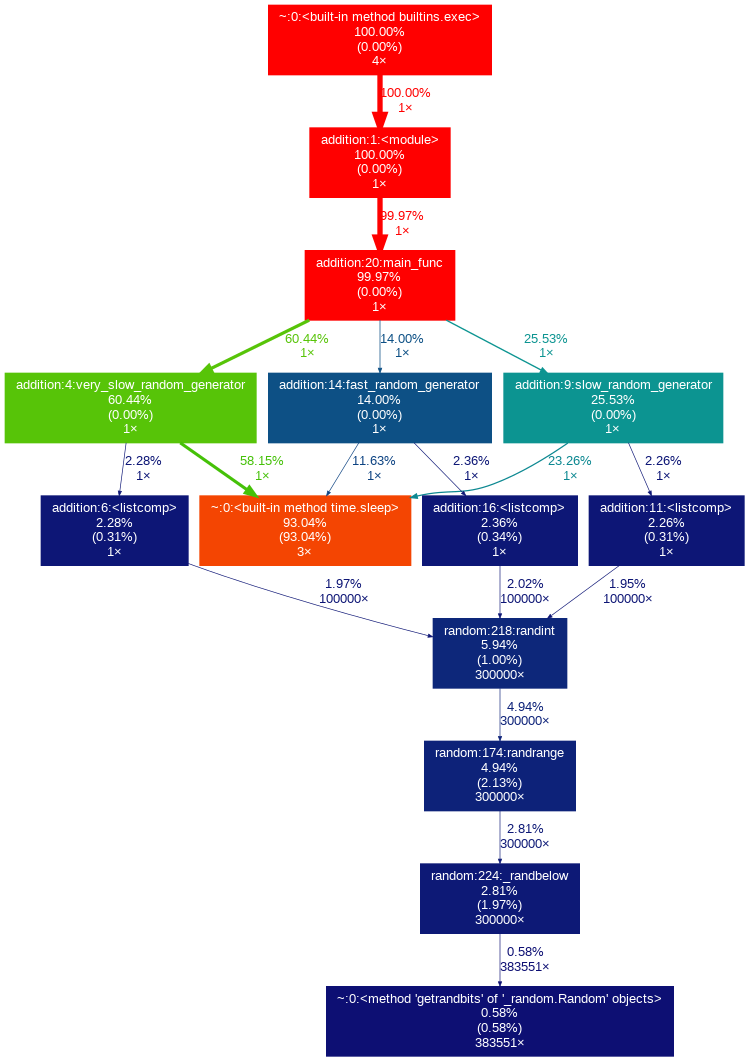

In [6]:
from IPython.display import Image
Image(filename='output.png') 

2.Snakeviz

In [7]:
!pip install snakeviz

     |████████████████████████████████| 282 kB 29.3 MB/s 


In [8]:
!snakeviz output.pstats

Port 8080 in use, trying another.
snakeviz web server started on 127.0.0.1:8081; enter Ctrl-C to exit
http://127.0.0.1:8081/snakeviz/%2Fcontent%2Foutput.pstats
snakeviz: error: no web browser found: could not locate runnable browser

usage: snakeviz [-h] [-v] [-H ADDR] [-p PORT] [-b BROWSER_PATH] [-s] filename

Start SnakeViz to view a Python profile.

positional arguments:
  filename              Python profile to view

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit
  -H ADDR, --hostname ADDR
                        hostname to bind to (default: 127.0.0.1)
  -p PORT, --port PORT  port to bind to; if this port is already in use a free
                        port will be selected automatically (default: 8080)
  -b BROWSER_PATH, --browser BROWSER_PATH
                        name of webbrowser to launch as described in the
                        documentation of Python's webbrowser module:
     

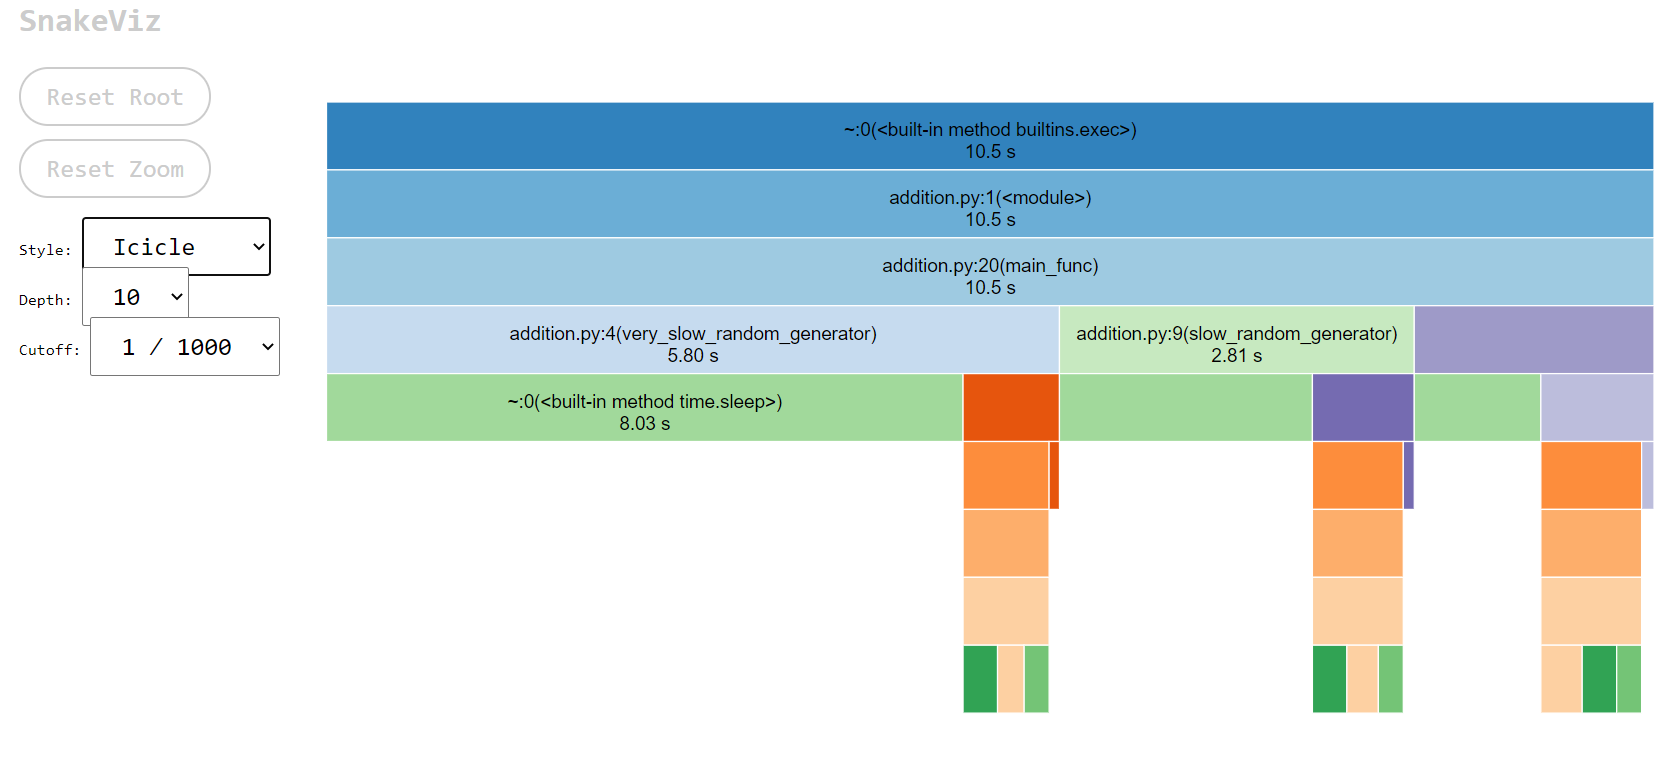

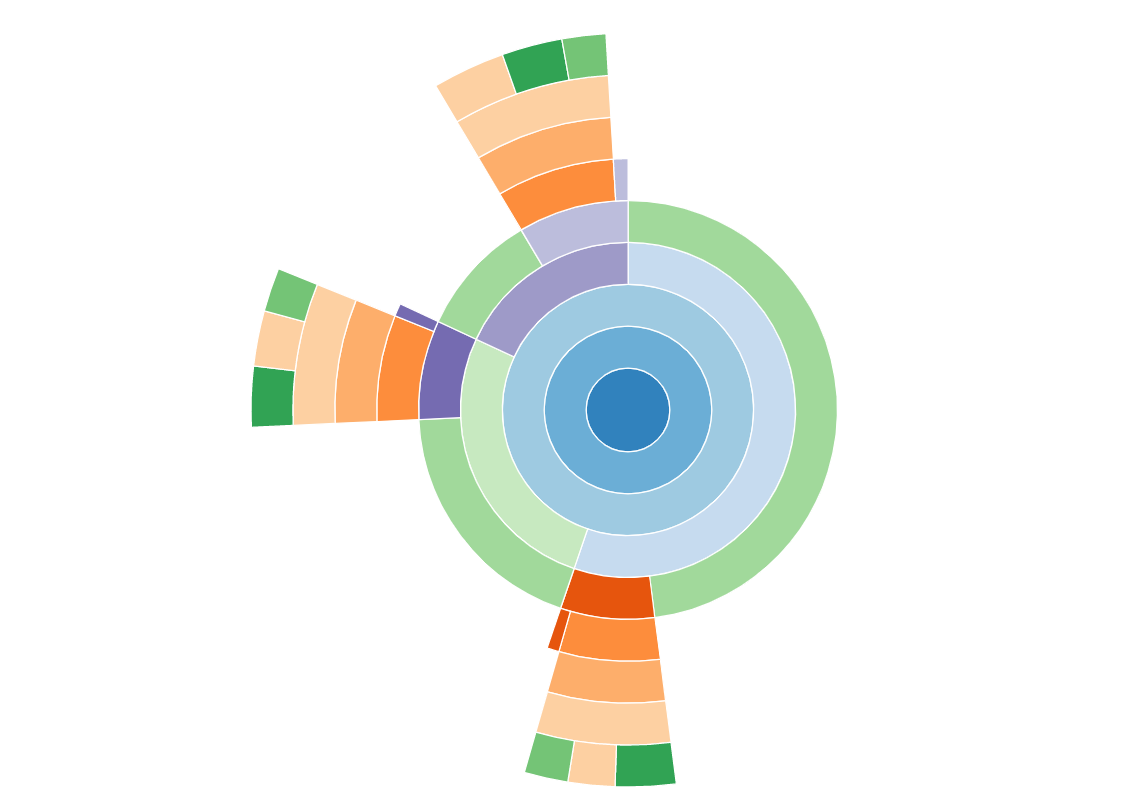

3.Tuna

In [9]:
!pip install tuna

     |████████████████████████████████| 147 kB 27.0 MB/s 


In [ ]:
!tuna output.pstats

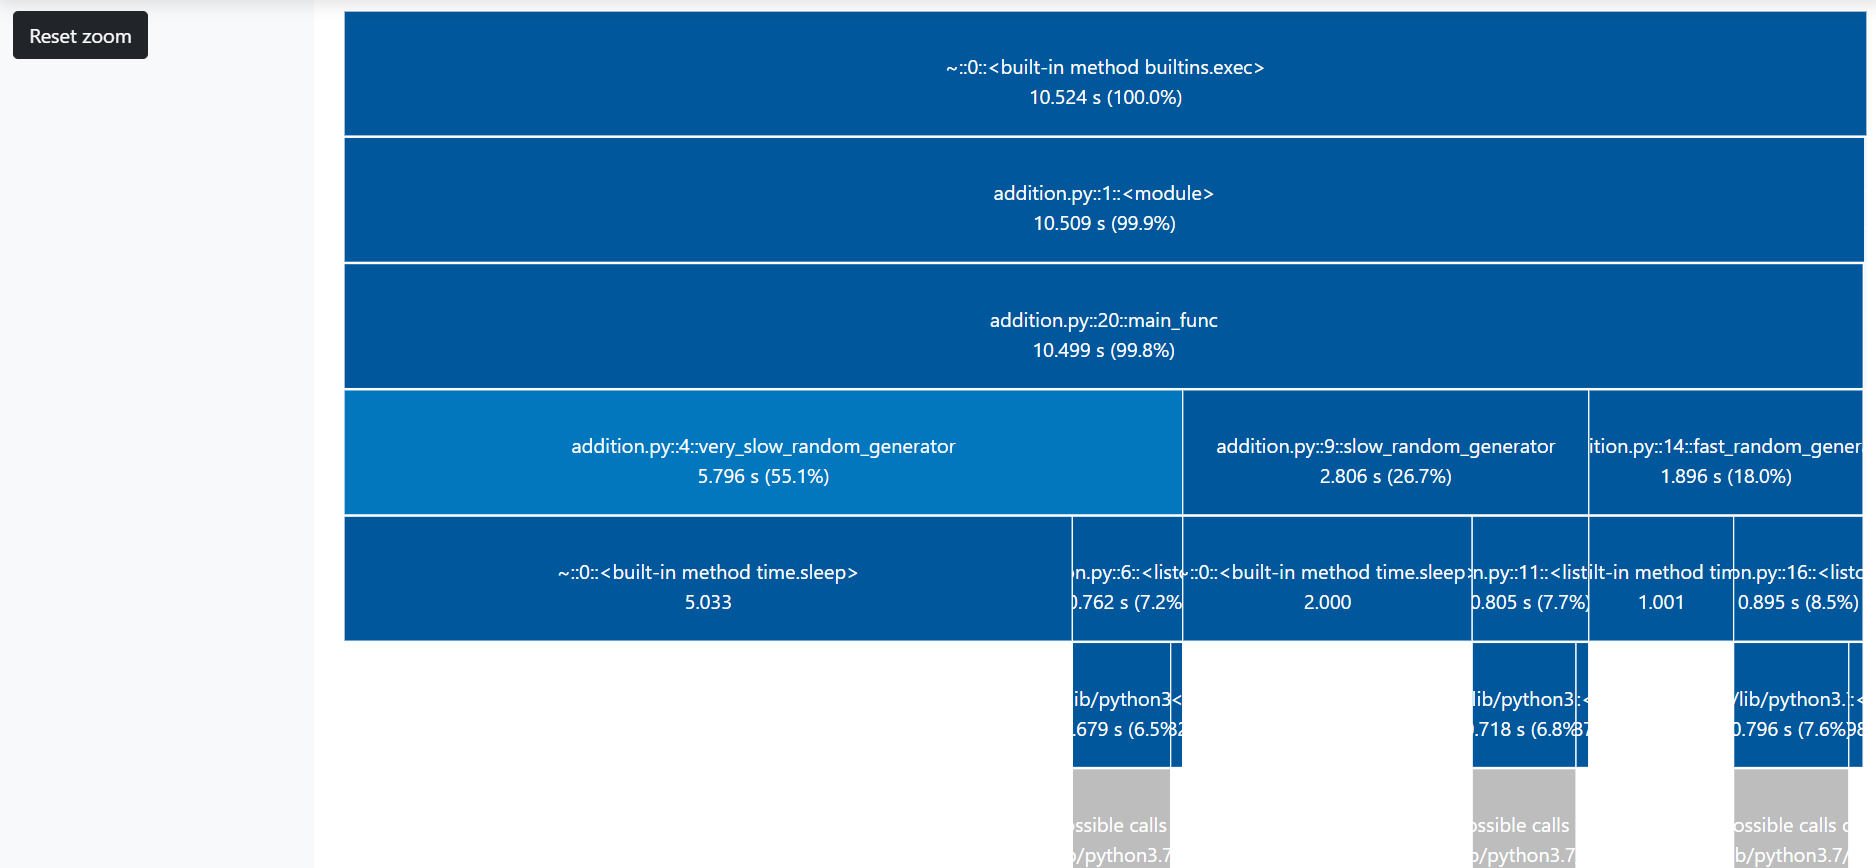

**Export as PDF**

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!cp drive/My\ Drive/Colab\ Notebooks/ProfilingPythonCode.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "ProfilingPythonCode.ipynb"